In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [15]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum05/data/Iris.csv"

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
df_iris = pd.read_csv(path)
print("5 DATA AWAL:")
print(df_iris.head())
print("\nInfo dataset:")
print(df_iris.info())

5 DATA AWAL:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 

In [19]:
print("\n=== LANGKAH 1: DATA PREPROCESSING ===")

# Cek missing values
print("Cek missing values:")
print(df_iris.isnull().sum())

# Cek data duplikat
print(f"\nJumlah data duplikat: {df_iris.duplicated().sum()}")

# Hapus kolom 'Id' jika ada (karena tidak diperlukan untuk modeling)
if 'Id' in df_iris.columns:
    df_iris = df_iris.drop('Id', axis=1)
    print("Kolom 'Id' telah dihapus")

print(f"Shape dataset setelah preprocessing: {df_iris.shape}")


=== LANGKAH 1: DATA PREPROCESSING ===
Cek missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Jumlah data duplikat: 0
Kolom 'Id' telah dihapus
Shape dataset setelah preprocessing: (150, 5)



=== LANGKAH 2: EXPLORATORY DATA ANALYSIS ===


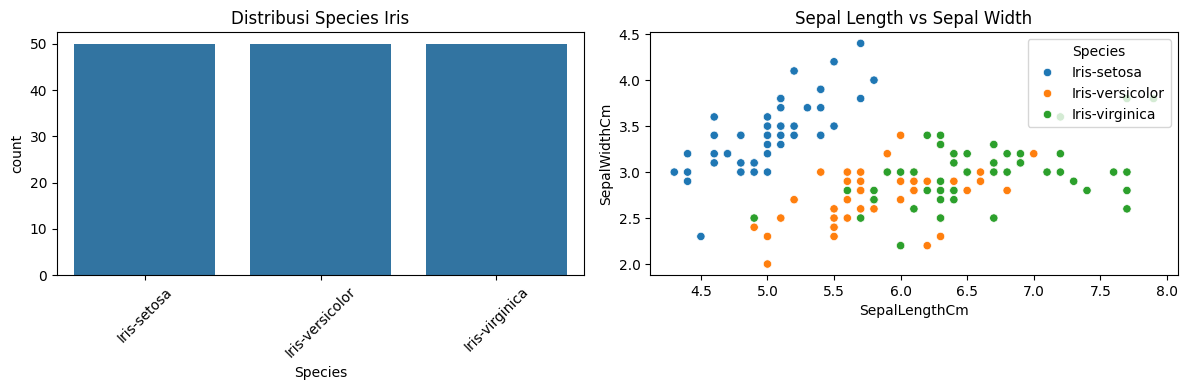


Statistik deskriptif:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [20]:
print("\n=== LANGKAH 2: EXPLORATORY DATA ANALYSIS ===")

# Visualisasi distribusi species
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Species', data=df_iris)
plt.title('Distribusi Species Iris')
plt.xticks(rotation=45)

# Visualisasi sepal dimensions
plt.subplot(1, 2, 2)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df_iris)
plt.title('Sepal Length vs Sepal Width')

plt.tight_layout()
plt.show()

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df_iris.describe())

In [21]:
print("\n=== LANGKAH 3: ENCODING DATA KATEGORIKAL ===")

# Encoding target variable (Species) menjadi numerik
species_cat = df_iris['Species'].astype('category')
species_classes = list(species_cat.cat.categories)
df_iris['Species_encoded'] = species_cat.cat.codes

print("Mapping species ke kode numerik:")
for i, species in enumerate(species_classes):
    print(f"  {species} -> {i}")

print("\nData setelah encoding:")
print(df_iris[['Species', 'Species_encoded']].head(10))


=== LANGKAH 3: ENCODING DATA KATEGORIKAL ===
Mapping species ke kode numerik:
  Iris-setosa -> 0
  Iris-versicolor -> 1
  Iris-virginica -> 2

Data setelah encoding:
       Species  Species_encoded
0  Iris-setosa                0
1  Iris-setosa                0
2  Iris-setosa                0
3  Iris-setosa                0
4  Iris-setosa                0
5  Iris-setosa                0
6  Iris-setosa                0
7  Iris-setosa                0
8  Iris-setosa                0
9  Iris-setosa                0



=== LANGKAH 4: ANALISIS KORELASI ===


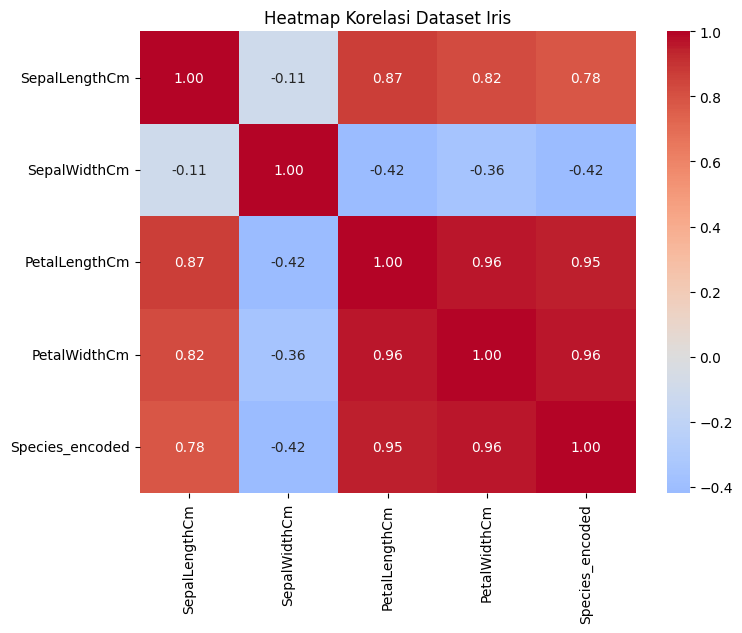

Matriks korelasi:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm         1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm         -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm         0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm          0.817954     -0.356544       0.962757      1.000000   
Species_encoded       0.782561     -0.419446       0.949043      0.956464   

                 Species_encoded  
SepalLengthCm           0.782561  
SepalWidthCm           -0.419446  
PetalLengthCm           0.949043  
PetalWidthCm            0.956464  
Species_encoded         1.000000  


In [22]:
print("\n=== LANGKAH 4: ANALISIS KORELASI ===")

# Heatmap korelasi
plt.figure(figsize=(8, 6))
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species_encoded']
correlation_matrix = df_iris[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Heatmap Korelasi Dataset Iris')
plt.show()

print("Matriks korelasi:")
print(correlation_matrix)

In [23]:
print("\n=== LANGKAH 5: SPLITTING DATA ===")

# Memilih fitur dan target
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df_iris[feature_cols]
y = df_iris['Species_encoded']

# Split data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Jumlah total data: {len(df_iris)}")
print(f"Data training: {len(X_train)} samples ({len(X_train)/len(df_iris)*100:.1f}%)")
print(f"Data testing: {len(X_test)} samples ({len(X_test)/len(df_iris)*100:.1f}%)")


=== LANGKAH 5: SPLITTING DATA ===
Jumlah total data: 150
Data training: 120 samples (80.0%)
Data testing: 30 samples (20.0%)


In [24]:
print("\n=== LANGKAH 6: PEMBUATAN MODEL DECISION TREE ===")

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

# Training model
dt_model.fit(X_train, y_train)

print("Model Decision Tree berhasil dibuat dan dilatih")
print(f"Kedalaman pohon: {dt_model.get_depth()}")
print(f"Jumlah leaf nodes: {dt_model.get_n_leaves()}")


=== LANGKAH 6: PEMBUATAN MODEL DECISION TREE ===
Model Decision Tree berhasil dibuat dan dilatih
Kedalaman pohon: 5
Jumlah leaf nodes: 8



=== LANGKAH 7: EVALUASI MODEL ===
Akurasi model: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



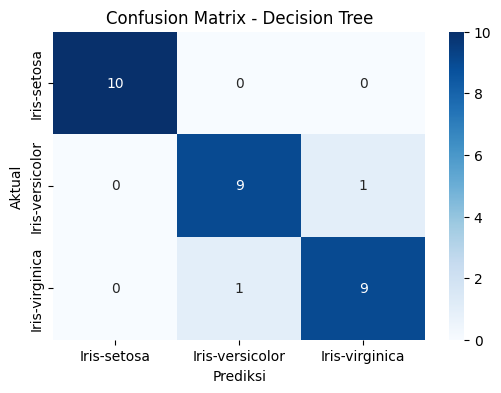

In [25]:
print("\n=== LANGKAH 7: EVALUASI MODEL ===")

# Prediksi pada data testing
y_pred = dt_model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=species_classes)

print(f"Akurasi model: {accuracy:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_classes, yticklabels=species_classes)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()


=== LANGKAH 8: VISUALISASI DECISION TREE ===


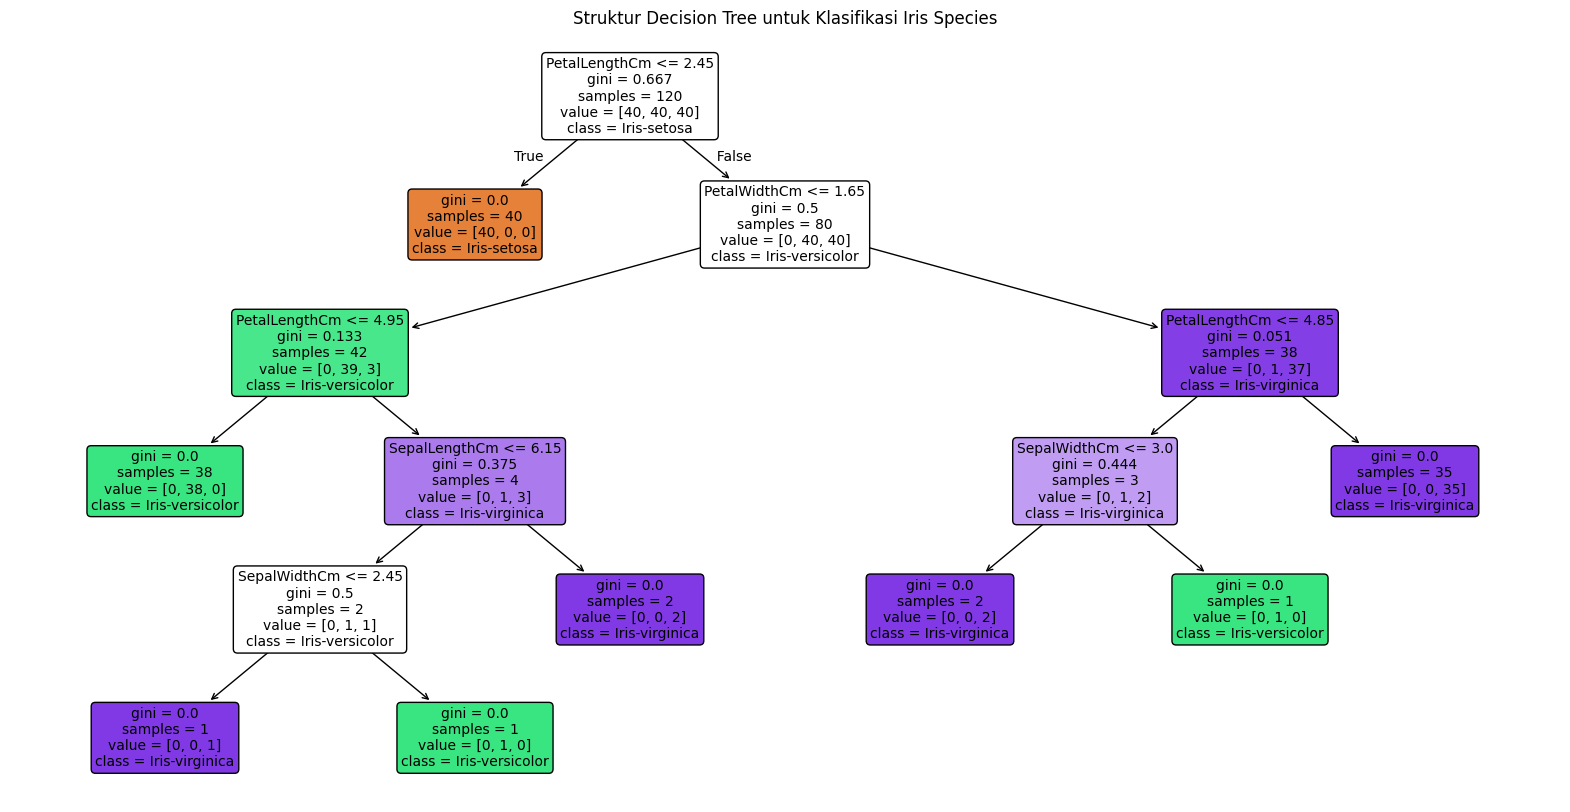

In [26]:
print("\n=== LANGKAH 8: VISUALISASI DECISION TREE ===")

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=feature_cols,
    class_names=species_classes,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Struktur Decision Tree untuk Klasifikasi Iris Species")
plt.show()


=== LANGKAH 9: FEATURE IMPORTANCE ===


/tmp/ipython-input-1096023931.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


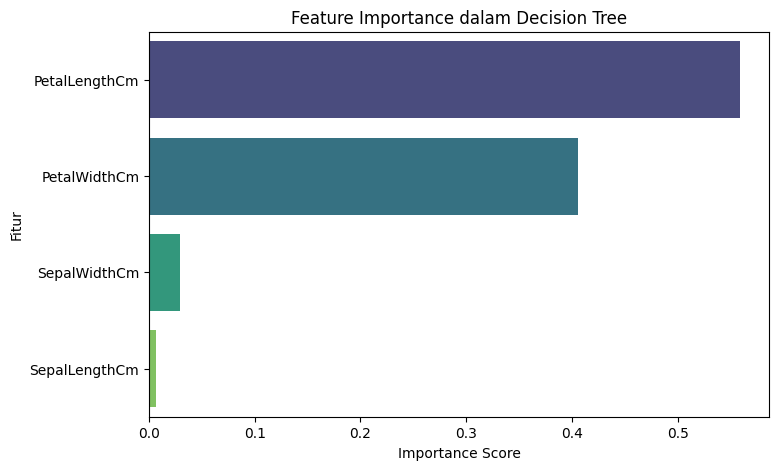

Feature Importance:
  PetalLengthCm: 0.559
  PetalWidthCm: 0.406
  SepalWidthCm: 0.029
  SepalLengthCm: 0.006


In [27]:
print("\n=== LANGKAH 9: FEATURE IMPORTANCE ===")

# Feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance dalam Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.show()

print("Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"  {feature}: {importance:.3f}")

In [28]:
print("\n=== LANGKAH 10: TESTING DENGAN DATA TESTING ===")

# Tampilkan hasil prediksi vs aktual
results_df = pd.DataFrame({
    'SepalLengthCm': X_test['SepalLengthCm'],
    'SepalWidthCm': X_test['SepalWidthCm'],
    'PetalLengthCm': X_test['PetalLengthCm'],
    'PetalWidthCm': X_test['PetalWidthCm'],
    'Aktual': [species_classes[i] for i in y_test],
    'Prediksi': [species_classes[i] for i in y_pred]
})

print("Hasil prediksi pada data testing:")
print(results_df.head(10))

# Hitung performa final
correct_predictions = (results_df['Aktual'] == results_df['Prediksi']).sum()
total_predictions = len(results_df)

print(f"\n=== HASIL FINAL ===")
print(f"Total data testing: {total_predictions}")
print(f"Prediksi benar: {correct_predictions}")
print(f"Prediksi salah: {total_predictions - correct_predictions}")
print(f"Akurasi final: {correct_predictions/total_predictions:.2%}")


=== LANGKAH 10: TESTING DENGAN DATA TESTING ===
Hasil prediksi pada data testing:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
38             4.4           3.0            1.3           0.2   
127            6.1           3.0            4.9           1.8   
57             4.9           2.4            3.3           1.0   
93             5.0           2.3            3.3           1.0   
42             4.4           3.2            1.3           0.2   
56             6.3           3.3            4.7           1.6   
22             4.6           3.6            1.0           0.2   
20             5.4           3.4            1.7           0.2   
147            6.5           3.0            5.2           2.0   
84             5.4           3.0            4.5           1.5   

              Aktual         Prediksi  
38       Iris-setosa      Iris-setosa  
127   Iris-virginica   Iris-virginica  
57   Iris-versicolor  Iris-versicolor  
93   Iris-versicolor  Iris-versicolor  
4